complete coding is done based on the paper [SEES](SEES.pdf)
## Major Project

In [1]:
#we need to connect to a GUI event loop. This tells IPython where (and how) to display plots.
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

### we need 

N    - the total number of HN nodes

Fs   - scalability factor which define as the maximum number of nodes to be accommodated in a single zone

L    - length of area

B    - cardinality of local base station(LBS)

n    - number of heterogeneity level

If N is the total number of nodes and n is the number of heterogeneity levels, then the network has n categories (types) of nodes: cate-1, cate-2, cate-3, ..., cate-n nodes with their cardinalities: N1t , N2t , N3t , ..., Nnt and energy levels: E1t , E2t , E3t , ..., Ent respectively, where:

                            N1t > N2t > N3t > ⋯ > Nnt
                            
                            E1t < E2t < E3t < ⋯ < Ent
                            
The different levels of node energies are related according to the following formula, where the initial energy of cate-i
nodes is alpha times more than that of cate-(i − 1):

                            Eit = E1t × (1 + (i − 1) × aplha)
                            
where alpha is constant. The number of cate-i nodes in the network is given by:

                            Nit = N × (beta − gamma1) × (beta − gamma2) × (beta − gamma3)×⋯× (beta − gammai)
                            
                            N1t + N2t + N3t + ⋯ + Nnt  = N
                            
alpha and betai are the primary and secondary parameters of heterogeneity in the Singh model respectively (Singh 2017), and
are related according to the following formula:

            (beta − gamma1) × (1 + (beta − gamma2) × (1 + (beta − gamma3)×⋯× (1 + (beta − gamman)))) = 1

and gammai is given by:

                            gammai = gammai−1 − 2 × theta

where Θ(theta) is constant. The value of first secondary parameter gamma1 is predefined and must satisfy the following inequality:

                            gamma1 / (2 × (n − 1)) > Θ


In [2]:
#taking inputs
N = int(input("Enter N( the total number of HN nodes)"))
Fs = int(input("Enter Fs()"))
L = int(input("Enter L(length of area)"))
B = int(input("Enter B(LBS)"))
n = int(input("Enter n(number of heterogeneity level)"))

#taking constants
alpha = float(input("Enter alpha"))#singh has taken this as 0.5
#beta = input("Enter beta")
gamma = float(input("Enter gamma"))#intial gamma will be given
theta = float(input("Enter theta"))#should validate a equation

Einti = float(input("Enter E1(initial energy)"))


print(N,Fs,L,B,n,alpha,gamma,theta,Einti)
#setting parameters are given based 4.2 section setting parameters

Enter N( the total number of HN nodes)2000
Enter Fs()20
Enter L(length of area)200
Enter B(LBS)12
Enter n(number of heterogeneity level)2
Enter alpha2
Enter gamma0.4
Enter theta0.025
Enter E1(initial energy)0.5
2000 20 200 12 2 2.0 0.4 0.025 0.5


In [3]:
#we need to validate theta and gamma values and find beta constant
if((gamma /  (2*(n-1)) ) > theta):
    print("proceed")
else:
    print("error in input values")

proceed


In [4]:
#assume i need 6 level heterogenity
#so now beta = gamma7
#finding gamma values

gammavalues = [gamma]
#getting gamma values
for i in range(1,n+1):
    #gammai = gammai-1 - 2*theta
    gammavalues.append(round(gammavalues[i-1] - 2*theta,3))
    
print(gammavalues)

[0.4, 0.35, 0.3]


In [5]:
#number of nodes in each level
beta = gammavalues[len(gammavalues)-1]
lastgamma = beta
gammavalues[:] = gammavalues[:len(gammavalues)-1]

print(gammavalues)

#https://docs.sympy.org/latest/modules/solvers/solvers.html#systems-of-polynomial-equations

[0.4, 0.35]


In [8]:
from sympy.solvers import solve
from sympy import Symbol
beta = Symbol('x',positive=True)
#https://docs.sympy.org/latest/modules/solvers/solvers.html#systems-of-polynomial-equations
f =1
for i in range(n-1,-1,-1):
    f = f*(beta-gammavalues[i])
    f= f+1

f = f-2
print(f)
beta = solve(f, beta)
print(beta)

(x - 0.4)*(x + 0.65) - 1
[1.00443569980765]


it is given that 
Etot = N*[(beta-gamma1)*E1 + (beta-gamma1*(beta-gamma2)*E2)+.....+(beta-gamm1)(beta-gamma2)..*En]
Energies are in Et
gamma values are in gammavalues

Singh as considered this

For beta == gamma2, the model describes the homogenous network or
1-level heterogeneity as the network contains only one type of
nodes. The number of nodes in the network is 100 for
MLHEED-1, which are of same type.

For beta == gamma3, the model describes 2-level heterogeneity as the
network contains two types of nodes. The number of type-1 and
type-2 nodes are 60 and 40, respectively, for MLHEED-2.

For beta == gamma4, the model describes 3-level heterogeneity as the
network contains three types of nodes. The number of type-1,
type-2, and type-3 nodes are 52, 30, and 18, respectively, for
MLHEED-3.

For beta == gamma5, the model describes 4-level heterogeneity as the
network contains four types of nodes. The number of type-1,
type-2, type-3, and type-4 nodes are 49, 26, 15, and 10, respectively,
for MLHEED-4.

For beta == gamma6, the model describes 5-level heterogeneity as the
network contains five types of nodes. The number of type-1,
type-2, type-3, type-4 and type-5 nodes are 47, 24, 14, 9 and 6,
respectively, for MLHEED-5.

For beta == gamma7, the model describes 6-level heterogeneity as the
network contains six types of nodes. The number of type-1, type-
2, type-3, type-4, type-5 and type-6 nodes are 46, 24, 13, 8, 5
and 4, respectively, for MLHEED-6.


why he did this?i don't know,i didn't read the paper..

so proceed further i will accept it..

let's take beta = gamma6 for 5 level heterogenity

In [9]:
#we have taken beta as 0.8544 for building temporarly as mentioned in singh's paper
#testing
print(alpha,beta,gamma,gammavalues)
print(N,Fs,L,B,n,alpha,gamma,theta,Einti)

2.0 [1.00443569980765] 0.4 [0.4, 0.35]
2000 20 200 12 2 2.0 0.4 0.025 0.5


In [23]:

Nt = [] #indicate cardinality of n categories
Et = [] #indicate Energy of n categories
EnergySinghTotal = []

for i in range(1,n+1):
    # we compute Nit and Eit and append them to Nt and Et,formulea are shown below
    #(Einti * (1 + ((i − 1) * alpha)))
    et = i-1
    et = et*alpha
    et = et+1
    et = et*Einti
    Et.append(et)
    #Nit = N × (beta − gamma1) × (beta − gamma2) × (beta − gamma3)×⋯× (beta − gammai)
    nt = N
    for j in range(0,i):
        nt = nt *(beta[0] - gammavalues[j])
    Nt.append(nt)

print(Et)
print(Nt)

import math
Nt1 = [round(Nt[i],1) for i in range(len(Nt))]
for i in range(len(Nt1)):
    if (Nt1[i]-int(Nt1[i])) >= 0.5:
        Nt1[i] = math.ceil(Nt1[i])
    else:
        Nt1[i] = math.floor(Nt1[i])
        

print(Nt1)

Nt[:] = Nt1[:]
for i in range(len(Nt1)):
    print("Nodes in level - ",i+1," = ",Nt[i] ," , Energy = ",Et[i])
    
for i in range(len(Nt)):
    EnergySinghTotal.append(Nt[i]*Et[i])
#https://www.geeksforgeeks.org/precision-handling-python/
print("According to singh's ")
for i in range(len(Nt1)):
    print("total Energy in level -",i," = ",EnergySinghTotal[i])

[0.5, 1.5]
[1208.87139961530, 791.128600384697]
[1209, 791]
Nodes in level -  1  =  1209  , Energy =  0.5
Nodes in level -  2  =  791  , Energy =  1.5
According to singh's 
total Energy in level - 0  =  604.5
total Energy in level - 1  =  1186.5


In [24]:
#checking
if N == sum(Nt):
    print("sum of nodes in all the level is equal to N ")
else:
    print("sum of nodes in all the level is not equal to N,Something went wrong ")

sum of nodes in all the level is equal to N 


In [25]:
#for sake of solving
print(Nt)
for i in range(len(Nt)):
    Nt[i] = float(Nt[i]/100)
    #print(Nt[i])
    if (Nt[i] - int(Nt[i])) >= 0.5:
        Nt[i] = math.ceil(Nt[i])*100
    else:
        Nt[i] = math.floor(Nt[i])*100
        
print(Nt)

[1209, 791]
[1200, 800]


# Now starts Hybrid Placement Algorithm


### note

First, it determines the number of zones Z, into
which A will be divided based on two main parameters: the
total number of HN nodes (N) in the network, and the scalability
factor ( Fs ) which we define as the maximum number
of nodes to be accommodated in a single zone. The value of
Z is given by:

In [26]:
Z = math.pow(math.ceil(math.sqrt(N)/math.sqrt(Fs)),2)
print(Z)

100.0


Second, it decides the number of HN nodes that will be deployed
in each single zone. according to the following formula:

In [27]:
Nz = []
for z in range(1,int(Z)+1):
    if z==1:
        Nz.append(math.ceil(N/Z))
    else:
        k = 0
        for i in Nz:
            k = k + i
            
        Nz.append(math.ceil((N - k)/(Z - z + 1)))
        
print(Nz)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


the working area A is divided into Z
equal zones each L /√Z × L /√Z . Then each Nz heterogeneous
nodes are randomly deployed in the respective zone in a
uniform manner such that the vertical and horizontal coordinates
of each node are randomly selected within the minimum
and maximum limits of the zone dimensions. Here, we
assume that the node sensing and communication ranges rs
and rc are set to L/ √Z.√2 and 2. L /√Z.√2 respectively.

In [28]:
#so 100 zones each with 20 nodes,for each node we need to find rsmax,rcmax

rsmax = []#node sensing
rcmax = []#communication ranges

for i in range(0,int(Z)):
    rsmax.append(  (L/math.sqrt(int(Z)  ))  *     math.sqrt(2)      )
    rcmax.append( (L/math.sqrt(int(Z)))*math.sqrt(2)*2)

print(rsmax,"                ",rcmax)
    

[28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902,

### Note
Third, it defines the value of R, the total number of EHs
that should be deployed as relay nodes over all the zones
as given by:

In [29]:
R = int(math.pow( math.sqrt(int(Z))+1 , 2 ))
print(R)

121


## NETWORK FORMATION

the working area A is divided into Z equal zones each L /√Z × L /√Z . 

In [30]:
D = int(L/math.sqrt(Z))
print(D)

20


You can use ticker to set the tick locations for the grid. The user can specify the input to MultipleLocator which will "Set a tick on every integer that is multiple of base in the view interval." 

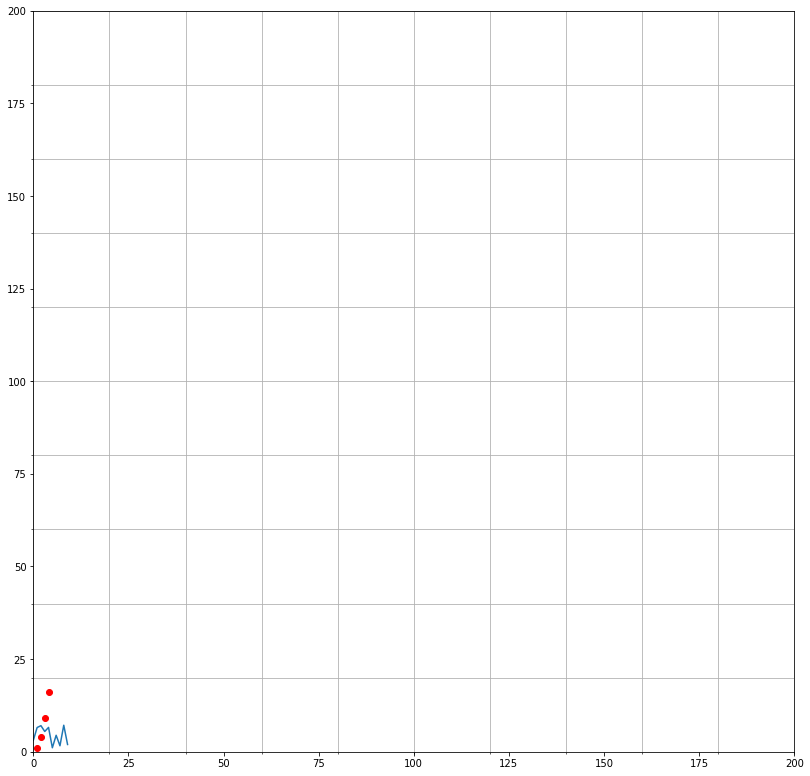

In [31]:
#this is testing plot
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np


fig = plt.figure(figsize=(30, 30))#defining size
ax1 = fig.add_subplot(2,2,1)#adding a plot to figure


spacing = D # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax1.plot(9 * np.random.rand(10))#testing
ax1.plot([1,2,3,4], [1,4,9,16], 'ro')#testing
# Set minor tick locations.
ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

plt.axis([0, L, 0, L])#defining axix x and y
# Set grid to use minor tick locations. 

ax1.grid(which = 'minor')#only major works fine

plt.show()

Now we need to process each zone

In each zone find Nzi random (x,y) with the zone limits and plot them

distribute R EH node at the corners of each node so it becomes 121 it hope

In [39]:
#this is for one zone we need to do it for all the zones
import random


rangeX = (0, 20)
rangeY = (0, 20)

# deltas = set()
# for x in range(1, 20):
#     for y in range(1, 20):
#         deltas.add((x,y))

randPoints = []
excluded = set()
i = 0
while i<D:
    x = random.randrange(*rangeX)
    y = random.randrange(*rangeY)
    if (x,y) in excluded: continue
    randPoints.append((x,y))
    i += 1
    excluded.update((x, y))
print(randPoints)
randomPoints = randPoints
#https://stackoverflow.com/questions/19668463/generating-multiple-random-x-y-coordinates-excluding-duplicates

#as i need to deploy a node in an x,y position with energy append to it,i am doing this
#randomly selelcting a node
#https://stackoverflow.com/questions/306400/how-to-randomly-select-an-item-from-a-list

#no of nodes in each level
nodesinlevel = []
for i in range(len(Nt)):
    nodesinlevel.append(int(Nt[i]/100))

id = 1
secure_random = random.SystemRandom()
nodeswithenergy = []#(x,y),energy,id
for j in range(len(nodesinlevel)):
    for i in range(nodesinlevel[j]):
        list1 = []
        list1.append(secure_random.choice(randPoints))
        randPoints.remove(list1[0])
        list1.append(Et[j])
        list1.append(id)
        id = id+1
        nodeswithenergy.append(list1)
        
print(nodeswithenergy)

def getpoints(startx,starty,endx,endy,id):
    rangeX = (startx,endx)
    rangeY = (starty,endy)
    randPoints = []
    excluded = set()
    i = 0
    while i<D:
        x = random.randrange(*rangeX)
        y = random.randrange(*rangeY)
        if (x,y) in excluded: continue
        randPoints.append((x,y))
        i += 1
        excluded.update((x, y))
        
    secure_random = random.SystemRandom()
    nodeswithenergy = []#(x,y),energy,id
    for j in range(len(nodesinlevel)):
        for i in range(nodesinlevel[j]):
            list1 = []
            list1.append(secure_random.choice(randPoints))
            randPoints.remove(list1[0])
            list1.append(Et[j])
            list1.append(id)
            id = id+1
            nodeswithenergy.append(list1)
    return(nodeswithenergy)

[(6, 6), (17, 0), (12, 8), (11, 8), (2, 2), (17, 3), (10, 4), (1, 17), (7, 10), (18, 16), (1, 8), (15, 18), (4, 8), (19, 4), (7, 3), (1, 17), (3, 16), (14, 9), (16, 7), (12, 3)]
[[(12, 3), 0.5, 1], [(11, 8), 0.5, 2], [(15, 18), 0.5, 3], [(3, 16), 0.5, 4], [(14, 9), 0.5, 5], [(4, 8), 0.5, 6], [(12, 8), 0.5, 7], [(19, 4), 0.5, 8], [(16, 7), 0.5, 9], [(7, 10), 0.5, 10], [(6, 6), 0.5, 11], [(18, 16), 0.5, 12], [(7, 3), 1.5, 13], [(17, 3), 1.5, 14], [(10, 4), 1.5, 15], [(17, 0), 1.5, 16], [(2, 2), 1.5, 17], [(1, 8), 1.5, 18], [(1, 17), 1.5, 19], [(1, 17), 1.5, 20]]


In [40]:
zonespoints = []
for i in range(0,int(math.sqrt(int(Z)))):#for y axis
    for j in range(0,int(math.sqrt(int(Z)))):#for x axis
        zonespoints.append(getpoints(j*20,i*20,(j+1)*20,(i+1)*20,j*20+1+200*i))

for i in zonespoints:
    print(i)

[[(11, 8), 0.5, 1], [(0, 11), 0.5, 2], [(16, 0), 0.5, 3], [(8, 16), 0.5, 4], [(0, 14), 0.5, 5], [(4, 13), 0.5, 6], [(2, 9), 0.5, 7], [(7, 2), 0.5, 8], [(14, 16), 0.5, 9], [(13, 15), 0.5, 10], [(7, 18), 0.5, 11], [(19, 10), 0.5, 12], [(18, 12), 1.5, 13], [(0, 4), 1.5, 14], [(1, 13), 1.5, 15], [(7, 16), 1.5, 16], [(12, 15), 1.5, 17], [(15, 4), 1.5, 18], [(11, 6), 1.5, 19], [(16, 11), 1.5, 20]]
[[(36, 6), 0.5, 21], [(39, 11), 0.5, 22], [(29, 6), 0.5, 23], [(29, 9), 0.5, 24], [(24, 5), 0.5, 25], [(29, 0), 0.5, 26], [(39, 13), 0.5, 27], [(30, 6), 0.5, 28], [(21, 6), 0.5, 29], [(32, 8), 0.5, 30], [(25, 9), 0.5, 31], [(26, 3), 0.5, 32], [(33, 17), 1.5, 33], [(24, 7), 1.5, 34], [(20, 12), 1.5, 35], [(23, 7), 1.5, 36], [(31, 7), 1.5, 37], [(27, 6), 1.5, 38], [(29, 8), 1.5, 39], [(28, 6), 1.5, 40]]
[[(40, 15), 0.5, 41], [(52, 13), 0.5, 42], [(45, 4), 0.5, 43], [(53, 1), 0.5, 44], [(41, 18), 0.5, 45], [(55, 3), 0.5, 46], [(51, 14), 0.5, 47], [(54, 5), 0.5, 48], [(58, 3), 0.5, 49], [(59, 11), 0.5,

### now we got the points perfectly,so what remains is ploting

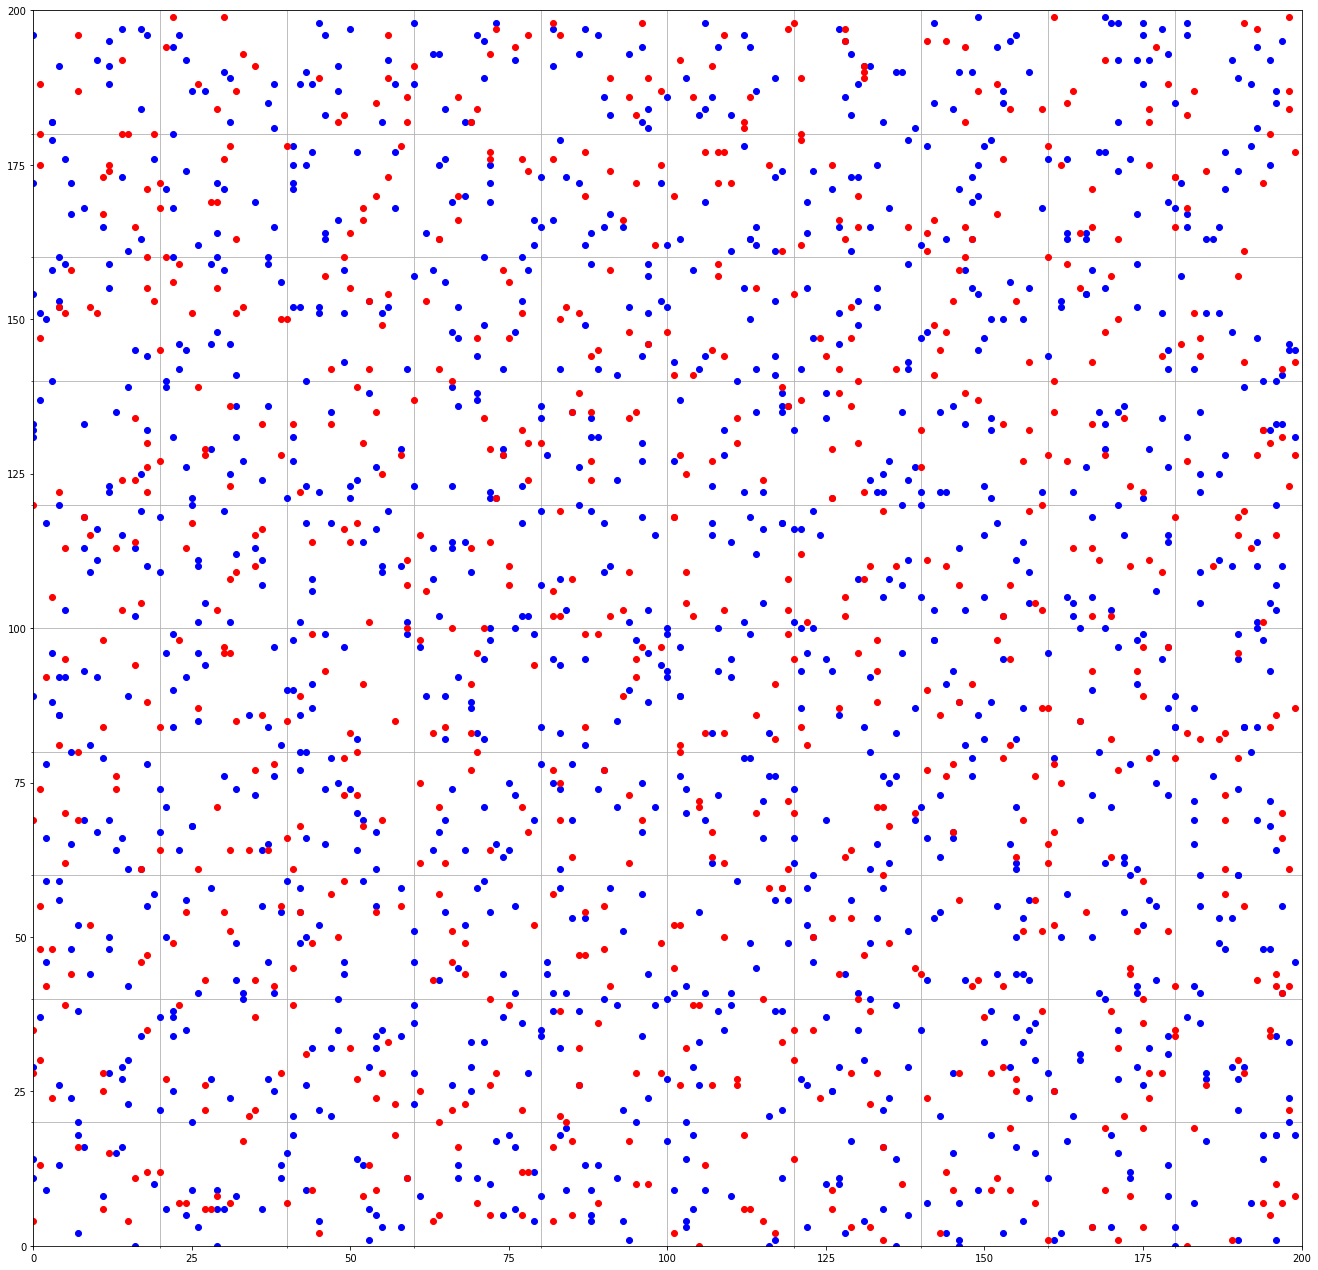

In [60]:
import numpy as np
x = [[] for i in range(len(Et))]
y = [[] for i in range(len(Et))]
for i in zonespoints:
    for j in i:
        for k in range(len(Et)):
            if Et[k] == j[1]:
                x[k].append(j[0][0])
                y[k].append(j[0][1])


#print(x,y)
fig = plt.figure(figsize=(50, 50))#defining size
ax1 = fig.add_subplot(2,2,1)#adding a plot to figure


spacing = D # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
# jet = plt.get_cmap('jet')
# colors = iter(jet(np.linspace(0,1,10)))
colors = ['b','r','g','c','m','y','k','w']
for i in range(0,len(x),1):
    ax1.plot(x[i],y[i], 'o',color = colors[i])
# Set minor tick locations.
ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

plt.axis([0, L, 0, L])#defining axix x and y
# Set grid to use minor tick locations. 

ax1.grid(which = 'minor')#only major works fine

plt.show()

In [61]:
#for each corner place a EH node
EH = []
for i in range(0,L+1,20):
    for j in range(0,L+1,20):
        EH.append((i,j))
print(EH)

EHx = []
EHy = []
for j in EH:
    EHx.append(j[0])
    EHy.append(j[1])
        
print(EHx,EHy)

[(0, 0), (0, 20), (0, 40), (0, 60), (0, 80), (0, 100), (0, 120), (0, 140), (0, 160), (0, 180), (0, 200), (20, 0), (20, 20), (20, 40), (20, 60), (20, 80), (20, 100), (20, 120), (20, 140), (20, 160), (20, 180), (20, 200), (40, 0), (40, 20), (40, 40), (40, 60), (40, 80), (40, 100), (40, 120), (40, 140), (40, 160), (40, 180), (40, 200), (60, 0), (60, 20), (60, 40), (60, 60), (60, 80), (60, 100), (60, 120), (60, 140), (60, 160), (60, 180), (60, 200), (80, 0), (80, 20), (80, 40), (80, 60), (80, 80), (80, 100), (80, 120), (80, 140), (80, 160), (80, 180), (80, 200), (100, 0), (100, 20), (100, 40), (100, 60), (100, 80), (100, 100), (100, 120), (100, 140), (100, 160), (100, 180), (100, 200), (120, 0), (120, 20), (120, 40), (120, 60), (120, 80), (120, 100), (120, 120), (120, 140), (120, 160), (120, 180), (120, 200), (140, 0), (140, 20), (140, 40), (140, 60), (140, 80), (140, 100), (140, 120), (140, 140), (140, 160), (140, 180), (140, 200), (160, 0), (160, 20), (160, 40), (160, 60), (160, 80), (16

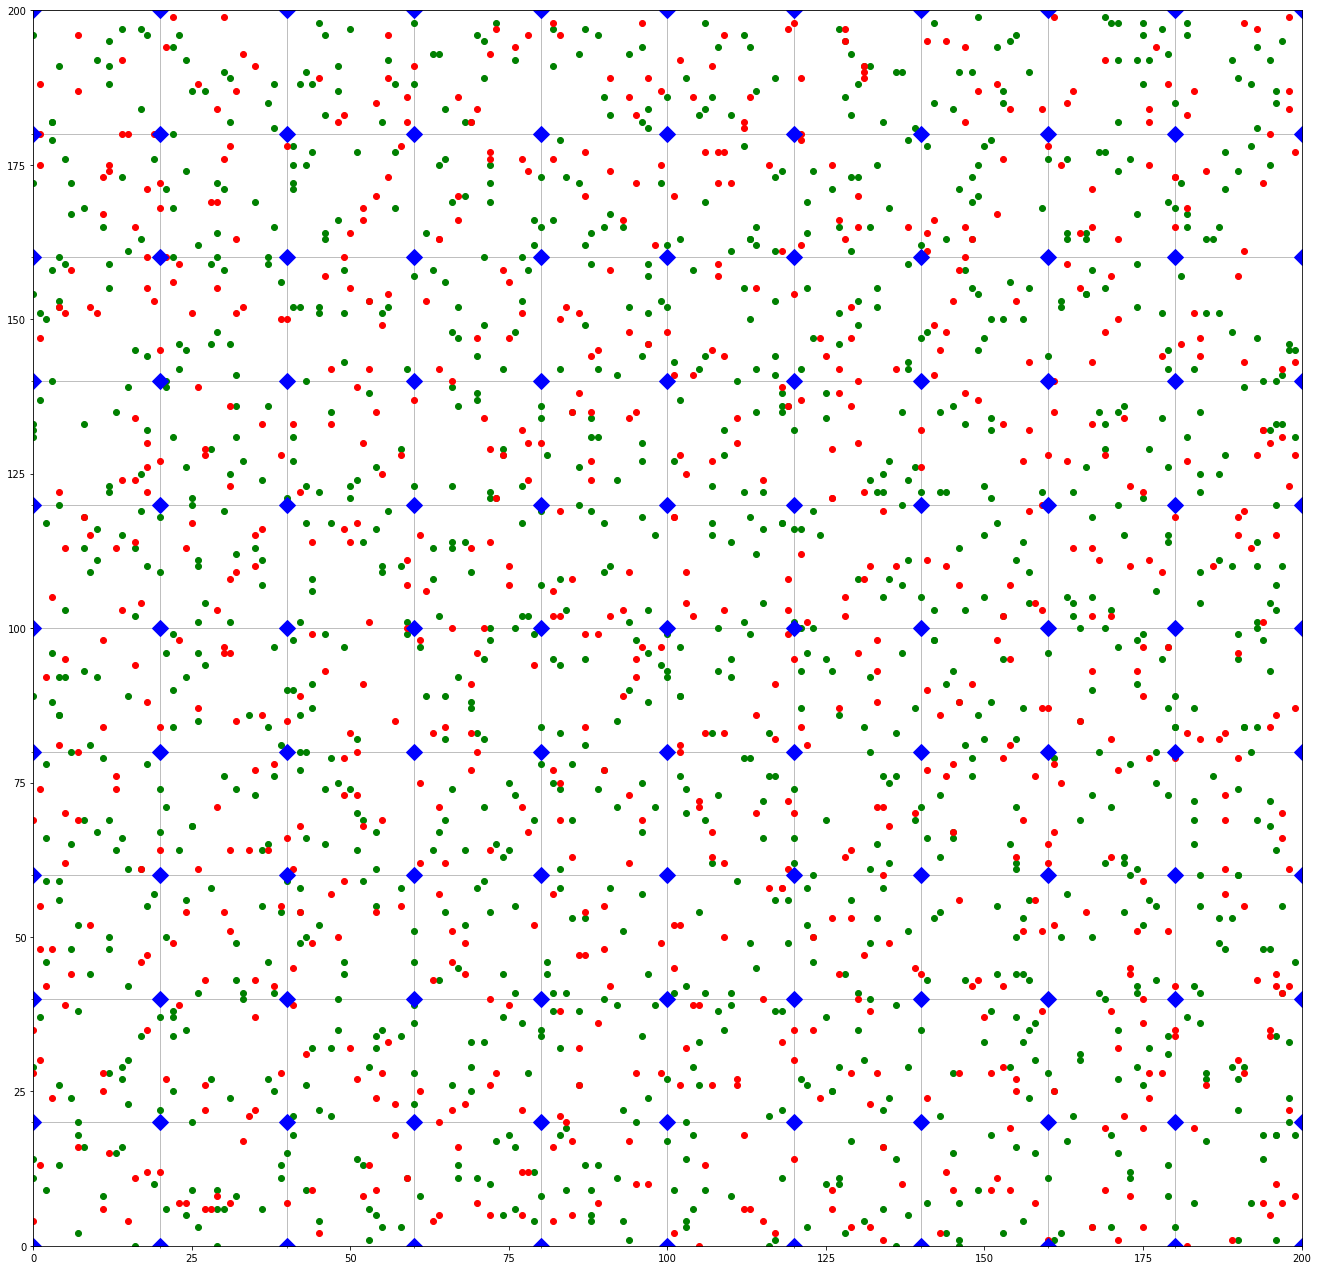

In [67]:
import numpy as np
x = [[] for i in range(len(Et))]
y = [[] for i in range(len(Et))]
for i in zonespoints:
    for j in i:
        for k in range(len(Et)):
            if Et[k] == j[1]:
                x[k].append(j[0][0])
                y[k].append(j[0][1])
        
#for each corner place a EH node
EH = []
for i in range(0,L+1,20):
    for j in range(0,L+1,20):
        EH.append((i,j))
#print(EH)

EHx = []
EHy = []
for j in EH:
    EHx.append(j[0])
    EHy.append(j[1])
        
#print(EHx,EHy)
#print(x,y)
fig = plt.figure(figsize=(50, 50))#defining size
ax1 = fig.add_subplot(2,2,1)#adding a plot to figure


spacing = D # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
# jet = plt.get_cmap('jet')
# colors = iter(jet(np.linspace(0,1,10)))
colors = ['g','r','c','m','y','k','b']
for i in range(0,len(x),1):
    ax1.plot(x[i],y[i], 'o',color = colors[i])
    
ax1.plot(EHx,EHy, 'D',color = colors[len(colors)-1],markersize=12)
# Set minor tick locations.
ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

plt.axis([0, L, 0, L])#defining axix x and y
# Set grid to use minor tick locations. 

ax1.grid(which = 'minor')#only major works fine

plt.show()

### At last placing of LBS

for each bs in LBS
    
    place them in predefined location

# multi stage weighted election heuristic method

### Intro(may help me in understanding)
SEES introduces a new election heuristic for choosing a set of
nodes called ZAG (Zone Aggregation Group) in every zone.
The task of ZAG is to collect data from other member nodes,
perform the data aggregation and forward to the EH relay
nodes. We call this heuristic as MSWE

1) MSWE is a general solution that supports up to
m different parameters ( p = p1, p2, p3,…, pm ) arranged in m
different levels of importance ( g = g1, g2, g3,…, gm ).

2) However,
it selects ZAG in m consecutive stages (stage-1, stage-2,
stage-3, ..., stage-m) based on a set of given weights of importance
( w = w1, w2, w3,…, wm ). In each stage, one of the given
parameters is taken as the dominant parameter (most important
parameter) and is given the highest weight (in a stage-i,
the dominant parameter is pi and is given w1 ).

3) MSWE runs in
two main procedures: (1) electing the ZAG member nodes, and
(2) assigning some of ZAG member nodes as zone aggregators
( ZAs ) for the current transmission round.

SEES provides a general model to generate the set of
weights w used in MSWE. The weight wi assigned to the
parameter in the importance level gi is given according to
the following formula:

                            wi = 𝜇 × wi−1, for i = 2, 3,…,m and 0 < 𝜇 ≤ 1

                            where w1 + w2 + w3 +...+ wm = 1

𝜇 is the weighting factor defined in advance by the
administrator based on some considerations (e.g., application
nature and election parameters used).

In [72]:
#from simulation parameters we get 𝜇 value
𝜇 = float(input("Enter the 𝜇 value"))
m = int(input("Enter m value"))# number of stages
print(𝜇,m)

Enter the 𝜇 value0.8
Enter m value4
0.8 4


                                        w2 = 𝜇 × w1 = pow(𝜇,1) × w1
                                        w3 = 𝜇 × w2 = 𝜇 × 𝜇 × w1 = pow(𝜇,2) × w1
                                        w4 = 𝜇 × w3 = 𝜇 × 𝜇 × 𝜇 × w1 = pow(𝜇,3) × w1

                                        wi = pow(𝜇,i−1) × w1
                                        
                                        w1 + w2 + w3 +⋯+ wm = 1
                                        
                                        w1 + 𝜇 × w1 + pow(𝜇,2) × w1 +⋯+ pow(𝜇,m−1) × w1 = 1
                                        
                                        w1 =  1/(1+𝜇+pow(𝜇,2)+....+pow(𝜇,m))

In [75]:
#finding initial weight
sum = 0
for i in range(0,m):
    sum =sum + math.pow(𝜇,i)
    
w1 = 1/sum

print(sum,w1)

weights = [w1]

#for remaining weight

for i in range(1,m):
    weights.append(𝜇*weights[i-1])
    
print(weights)#these weigths are used in every stage of ZAG election without any change in their value


weights[:] = [round(weights[i],2) for i in range(len(weights))]
print(weights)
#testing condition ,mah.fsum is used for computing sum of float values
if (math.fsum(weights) == 1):
    print("No Error in weights")
else:
    print("Error in weights")

2.9520000000000004 0.3387533875338753
[0.3387533875338753, 0.27100271002710025, 0.2168021680216802, 0.17344173441734417]
[0.34, 0.27, 0.22, 0.17]
No Error in weights


there are actually 3 parameters that are to be considered

    residual energy
    centrality
    distance to the nearest relay node
    
    